# Name: Qaidjohar Dama
# Batch: DST 10923

# Problem Statement: Develop a machine learning model to predict the ticket price for Indian Railways based on various factors such as 'baseFare', 'reservationCharge', 'superfastCharge', 'serviceTax', 'cateringCharge', 'dynamicFare', 'duration', and 'distance'. The goal is to create a predictive model that can accurately estimate the ticket price by analyzing the relationships and patterns within these columns, thereby enhancing the efficiency and accuracy of fare predictions for passengers and stakeholders in the Indian Railways system.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from mlxtend.evaluate import bias_variance_decomp

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler

from math import sqrt

In [2]:
df = pd.read_csv('price_data.csv')

In [3]:
df.head()

,baseFare,reservationCharge,superfastCharge,fuelAmount,totalConcession,tatkalFare,serviceTax,otherCharge,cateringCharge,dynamicFare,totalFare,availability,trainNumber,timeStamp,fromStnCode,toStnCode,classCode,distance,duration
0,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,1A,54,33.0
1,626,50,0,0.0,0,0,34.0,0,0,0,710,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,2A,54,33.0
2,441,40,0,0.0,0,0,24.0,0,0,0,505,"[{'date': '2-12-2023', 'status': 'AVAILABLE-01...",11464,2023-10-03 22:13:07.781307,JBP,SRID,3A,54,33.0
3,125,20,0,0.0,0,0,0.0,0,0,0,145,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,SL,54,33.0
4,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,KKB,1A,69,49.0


In [4]:
#df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')


In [5]:
df.describe()

,baseFare,reservationCharge,superfastCharge,fuelAmount,totalConcession,tatkalFare,serviceTax,otherCharge,cateringCharge,dynamicFare,totalFare,trainNumber,distance,duration
count,326643.000000,326643.000000,326643.000000,326643.0,326643.0,326643.0,326643.000000,326643.000000,326643.000000,326643.000000,326643.000000,326643.000000,326643.000000,326643.000000
mean,890.075122,38.157805,20.058091,0.0,0.0,0.0,42.761510,0.053208,4.990601,4.224771,1000.355281,14597.751870,587.745153,644.124564
std,793.765711,14.324952,24.646072,0.0,0.0,0.0,45.080793,1.018403,42.586032,49.050982,872.003147,4734.686291,548.858324,581.665800
min,30.000000,15.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,45.000000,1027.000000,1.000000,-1423.000000
25%,362.000000,20.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,395.000000,12316.000000,164.000000,193.000000
50%,626.000000,40.000000,0.000000,0.0,0.0,0.0,34.000000,0.000000,0.000000,0.000000,710.000000,13020.000000,404.000000,462.000000
75%,1222.000000,50.000000,45.000000,0.0,0.0,0.0,65.000000,0.000000,0.000000,0.000000,1370.000000,18477.000000,861.000000,936.000000
max,6541.000000,60.000000,75.000000,0.0,0.0,0.0,334.000000,25.000000,1365.000000,1518.000000,8375.000000,22645.000000,3149.000000,3225.000000


## Columns Fuel Amount, Total Concession and Tatkal Fare have no Standard Deviation therefore no impact on Total fare.
## Also otherCharge has an average impact of 0.05 Rupees on total fare,which is negligible

In [6]:
# Select categorical columns
obj_cols = df.select_dtypes(include=['object','int64','float64']).columns

# Count the number of unique values in each of the column names saved in obj_cols & print column name if only 1 unique value
for i in obj_cols:
    # calculate unique values 
    unique_values = len(df[i].value_counts())
    if unique_values == 1:
        print(i, 'column has only 1 unique value')

fuelAmount column has only 1 unique value
totalConcession column has only 1 unique value
tatkalFare column has only 1 unique value


## Fuel Amount ,Total Concession, and Tatkal Fare are columns with unique values, which means they do not contribute much.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326643 entries, 0 to 326642
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   baseFare           326643 non-null  int64  
 1   reservationCharge  326643 non-null  int64  
 2   superfastCharge    326643 non-null  int64  
 3   fuelAmount         326643 non-null  float64
 4   totalConcession    326643 non-null  int64  
 5   tatkalFare         326643 non-null  int64  
 6   serviceTax         326643 non-null  float64
 7   otherCharge        326643 non-null  int64  
 8   cateringCharge     326643 non-null  int64  
 9   dynamicFare        326643 non-null  int64  
 10  totalFare          326643 non-null  int64  
 11  availability       326643 non-null  object 
 12  trainNumber        326643 non-null  int64  
 13  timeStamp          326643 non-null  object 
 14  fromStnCode        326643 non-null  object 
 15  toStnCode          326643 non-null  object 
 16  cl

## The dataset has no Null values in remaining columns and hence no missing values.

In [8]:
unique_trains=len(pd.unique(df['trainNumber']))
unique_trains

533

## The dataset contains data of 533 different trains

## Lets compare columns with each othere to identify a relation between them.

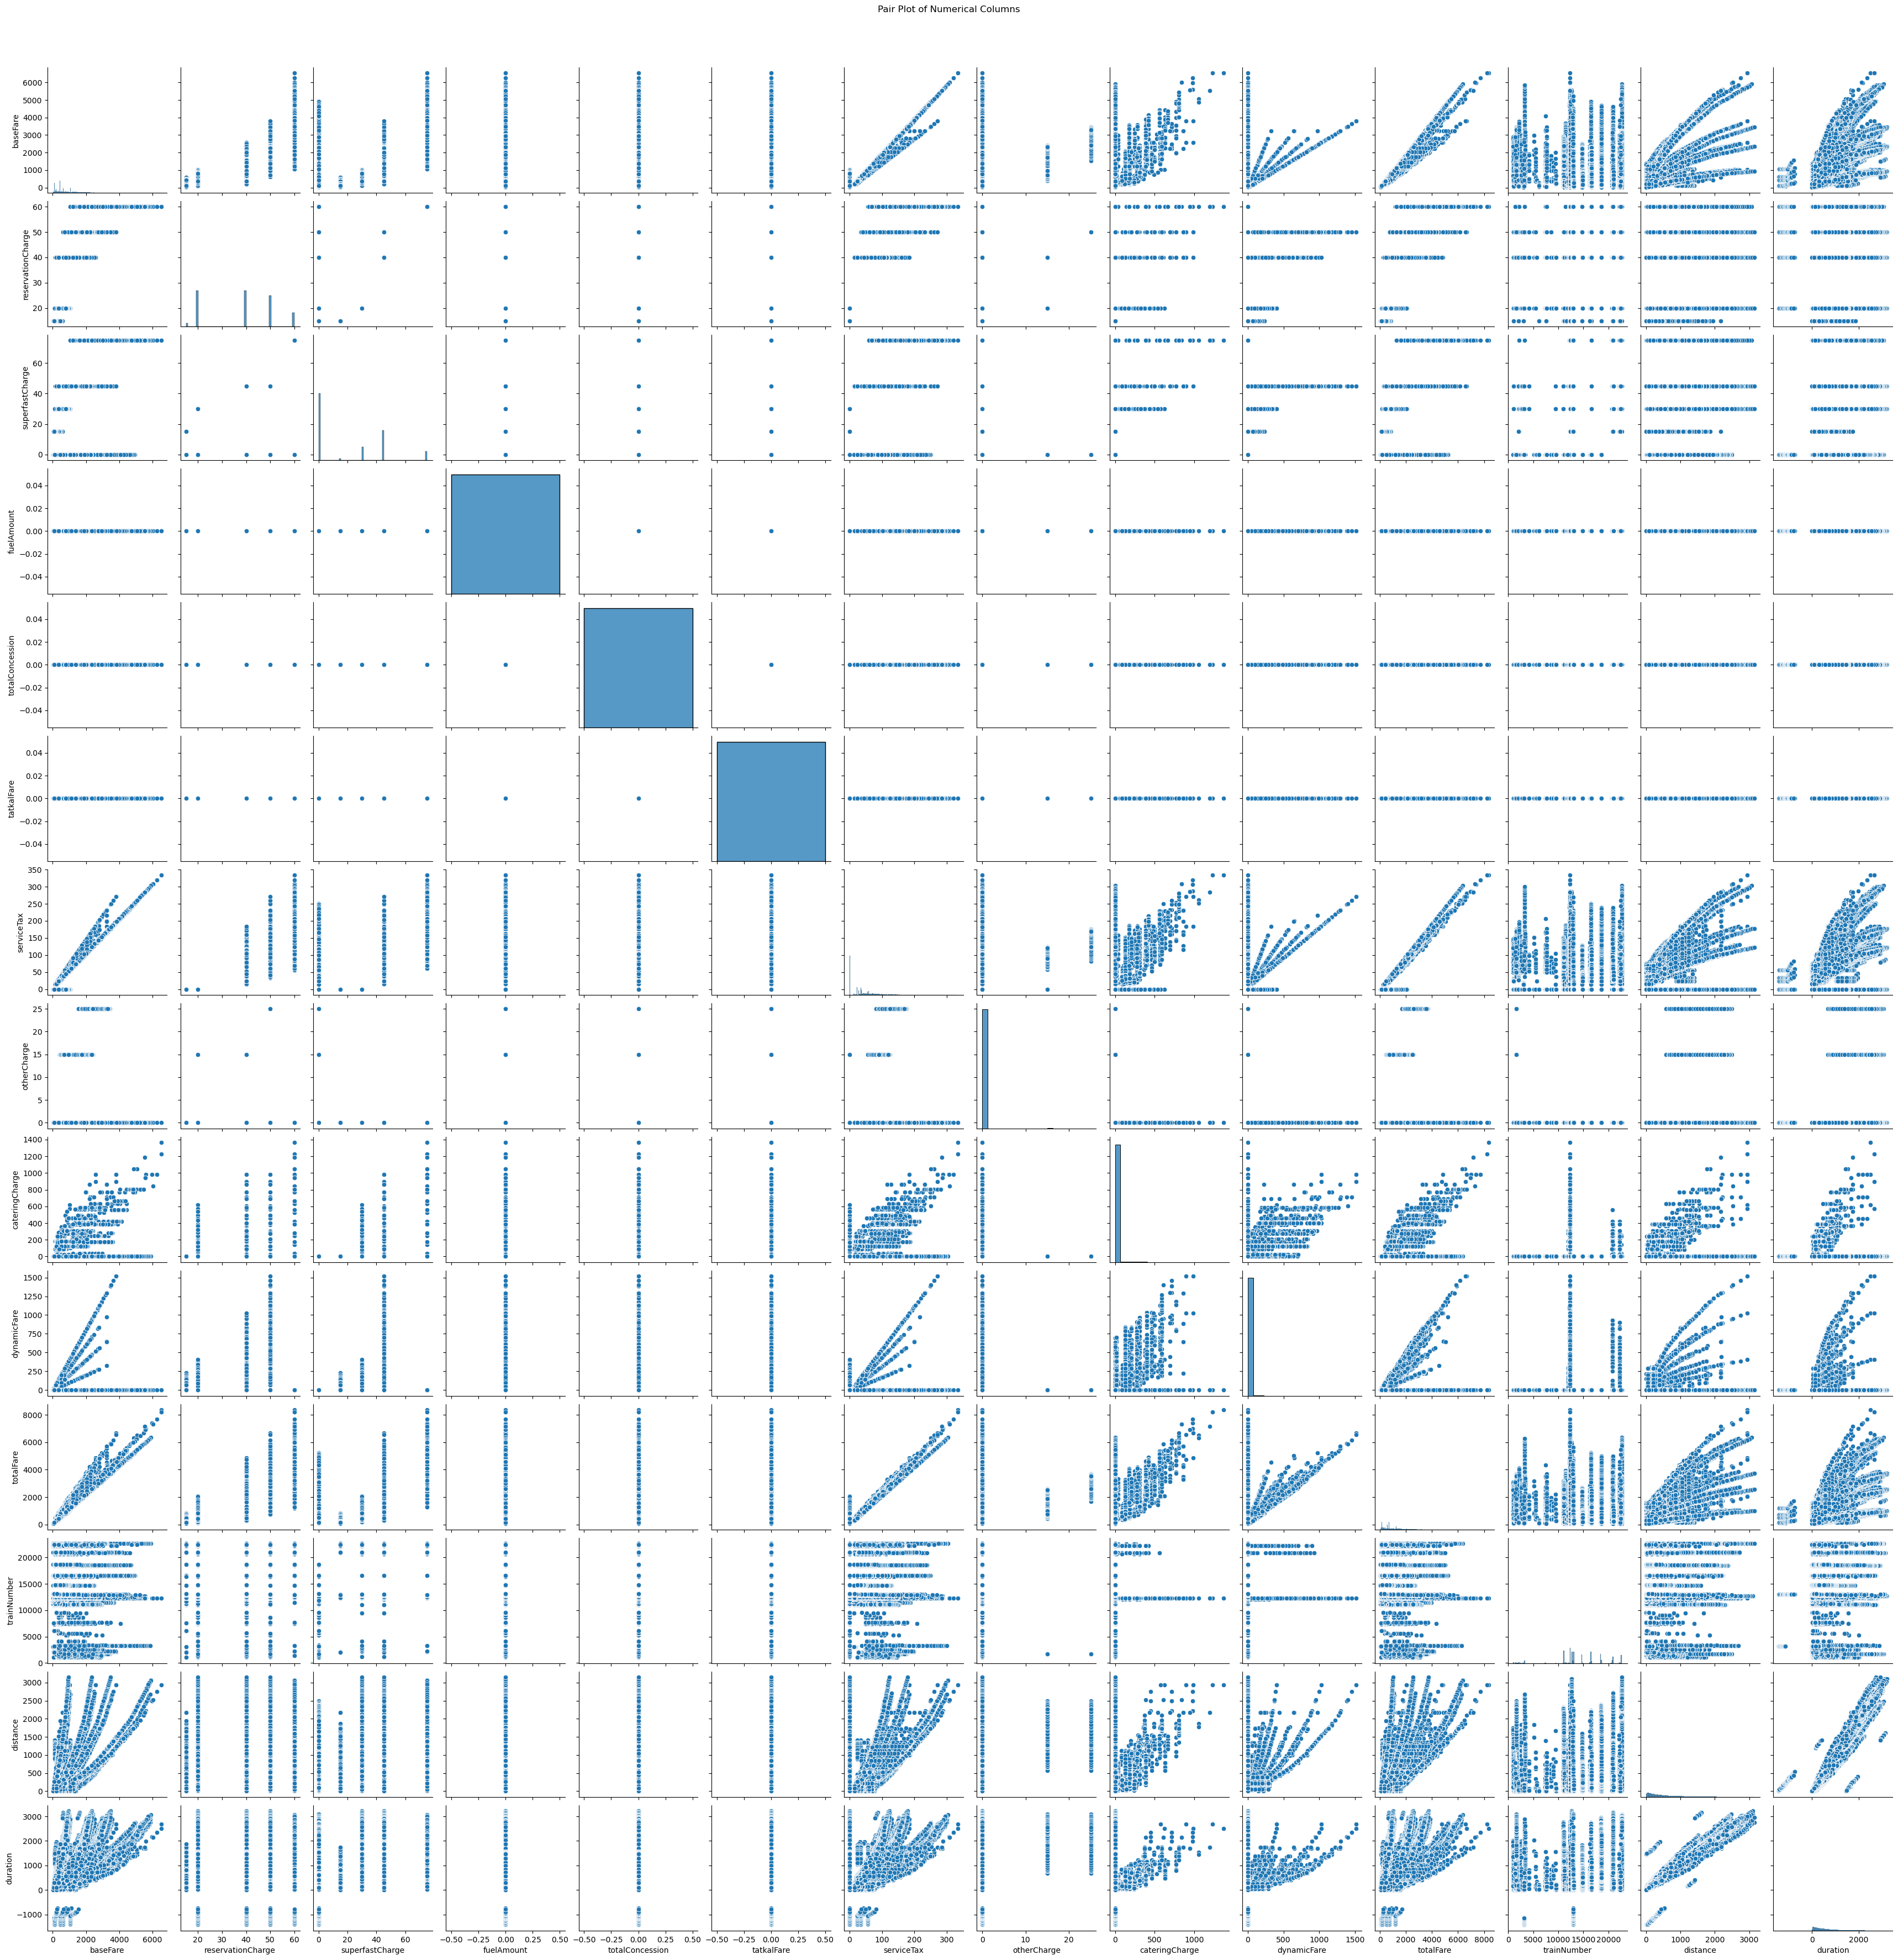

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numerical_columns],height=2.5)
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

## Reservation charges and Superfast charges are constant throughout. They are not affected by any attribute.

## Base fare is in linear relation with all except train number.

## Total fare depends on Base Fare,Distance, Duration,Service Tax,Dynamic Fare, Catering Charge

## Total Fare has  a linear relation with most of the attributes.Depending on this Linear Regression Model can be used. 


Distribution of Numerical Features:


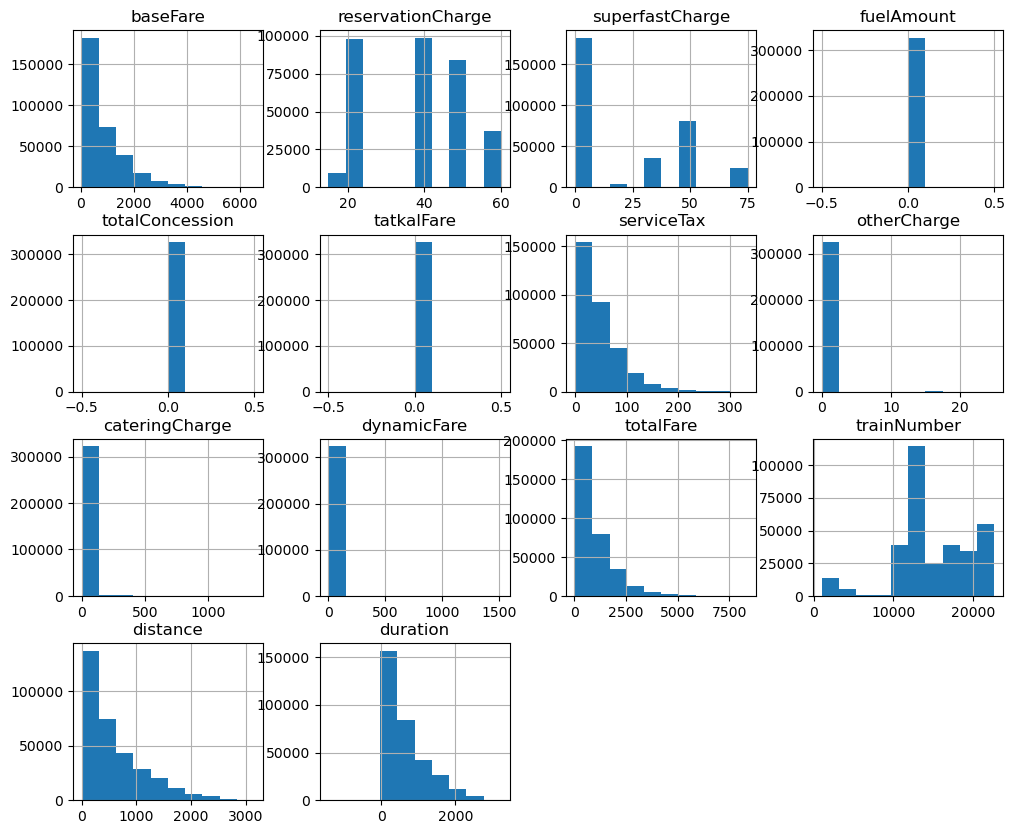

In [11]:
print("\nDistribution of Numerical Features:")
df.hist(figsize=(12, 10))
plt.show()

## This graph shows that some attributes have no change with frequency while some do change with frequency.

## Duration, Distance, Total fare, Service Tax and Base Fare have a lesser frequency for higher Measures.


Distribution of Categorical Features:


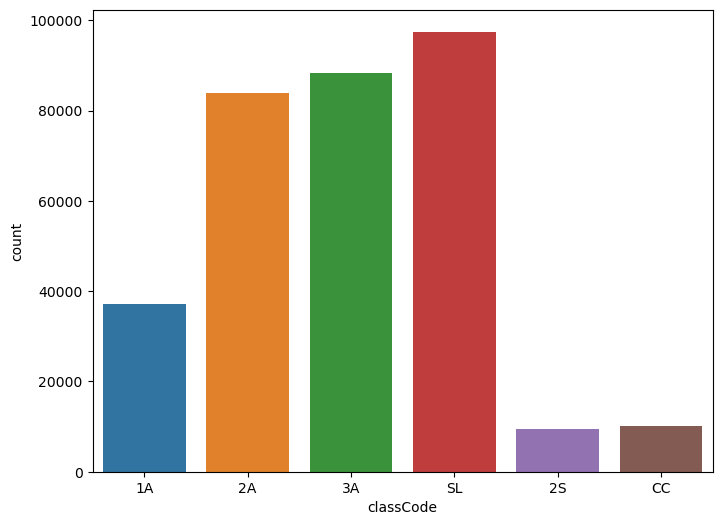

In [12]:
print("\nDistribution of Categorical Features:")
plt.figure(figsize=(8, 6))
sns.countplot(x='classCode', data=df)
plt.show()

## People Mostly prefer SL, 3A and 2A tickets during travelling.


Correlation Analysis:


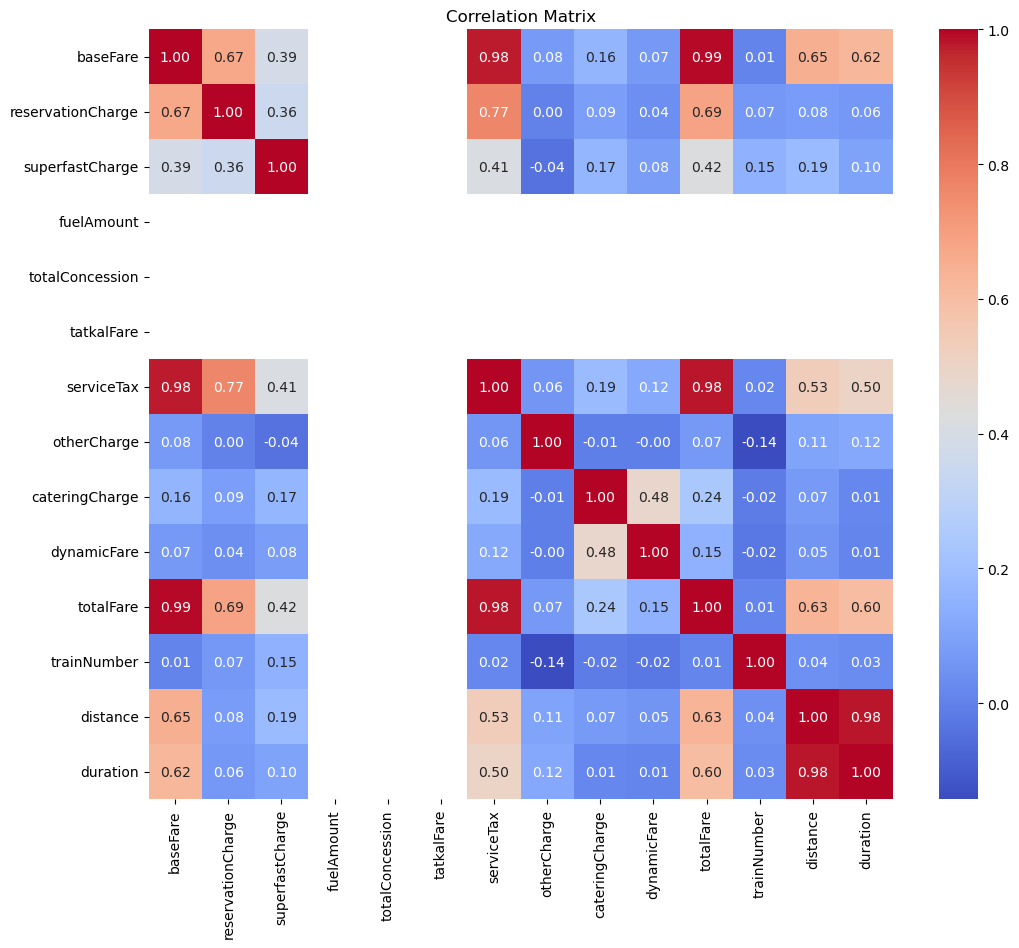

In [13]:
df_new=df.copy()
df_new.drop(['availability','timeStamp','fromStnCode','toStnCode','classCode'],axis=1,inplace=True)
print("\nCorrelation Analysis:")
correlation_matrix = df_new.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Total Fare is Highly Correlated with Base Fare, Reservation Charge, Service Tax, Superfast Charge, Duration, Distance and Mildly Correlated with Catering Charge and Dynamic Fare.

# Features Fuel Amount, Total Concession, Tatkal Fare have No Correlation with Total Fare. Also Other Charge and Train Number have Least Impact on Total Fare.

## Removing useless Columns 

In [9]:
df.drop(['fuelAmount','totalConcession','tatkalFare','otherCharge','trainNumber'],axis=1,inplace=True)

In [10]:
y=df.totalFare

In [11]:
'''df_now = df[['classCode','baseFare','reservationCharge','duration', 'serviceTax', 'distance']]
dummies = pd.get_dummies(df_now['classCode'])
merge = pd.concat([df_now, dummies], axis='columns')
X = merge.drop(['classCode'], axis='columns')'''


X=df[['baseFare','reservationCharge','superfastCharge', 'serviceTax', 'cateringCharge', 'dynamicFare','duration', 'distance']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=37)

# Linear Regression

In [32]:
model = LinearRegression()

scores = []

LRpipeline = Pipeline([('scaler2' , StandardScaler()),
                        ('LinearRegressor:', model)])
LRpipeline.fit(X_train, y_train)
y_pred = LRpipeline.predict(X_test)

LRpipeline.score(X_test, y_test)

## Linear Regression Model is an excellent fit for this data set.

In [14]:
mse = mean_squared_error(y_test, y_pred)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Bias variance decompositions
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(LRpipeline,
                                                            X_train_np, y_train_np,
                                                            X_test_np, y_test_np,
                                                            loss='mse',
                                                            random_seed=23,
                                                            num_rounds=5,
                                                            )

# Print the result
print('Average expected loss: %.2f' % avg_expected_loss)
print('Average bias: %.2f' % avg_bias)
#print('Average variance: %.2f' % avg_var)


print('Explained variance_score:', explained_variance_score(y_test, y_pred))
print('Max_error:', max_error(y_test, y_pred))
print('Mean_absolute_error score:', mean_absolute_error(y_test, y_pred))
print('Mean_squared_error score:', mean_squared_error(y_test, y_pred))
print('Root mean_squared_error:', sqrt(mean_squared_error(y_test, y_pred)))

Average expected loss: 1.12
Average bias: 1.12
Explained variance_score: 0.9999985217764332
Max_error: 24.86785179398271
Mean_absolute_error score: 0.18015889734709314
Mean_squared_error score: 1.1186337306873104
Root mean_squared_error: 1.0576548258705722


## These metrics collectively suggest that the model is performing exceptionally well on the dataset. The high explained variance, low error metrics, and low bias are indicative of a model that is accurately capturing the patterns in the data.

In [24]:
res1=y_test-y_pred

# Random Forest Regressor

In [33]:
model = RandomForestRegressor(n_estimators=150, n_jobs=-1)

scores = []

RFpipeline = Pipeline([('scaler2' , StandardScaler()),
                        ('RandomForestRegressor: ', model)])
RFpipeline.fit(X_train , y_train)
y_pred = RFpipeline.predict(X_test)

scores.append(RFpipeline.score(X_test, y_test))
print(scores)

[0.999982797020953]


In [17]:
mse = mean_squared_error(y_test, y_pred)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values


# Bias variance decompositions
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(RFpipeline,
                                                            X_train_np, y_train_np,
                                                            X_test_np, y_test_np,
                                                            loss='mse',
                                                            random_seed=23,
                                                            num_rounds=8,
                                                            )

# Print the result
print('Average expected loss: %.2f' % avg_expected_loss)
print('Average bias: %.2f' % avg_bias)
#print('Average variance: %.2f' % avg_var)


print('Explained variance_score:', explained_variance_score(y_test, y_pred))
print('Max_error:', max_error(y_test, y_pred))
print('Mean_absolute_error score:', mean_absolute_error(y_test, y_pred))
print('Mean_squared_error score:', mean_squared_error(y_test, y_pred))
print('Root mean_squared_error:', sqrt(mean_squared_error(y_test, y_pred)))

Average expected loss: 26.62
Average bias: 19.35
Explained variance_score: 0.9999840194390366
Max_error: 557.9666666666662
Mean_absolute_error score: 0.18961252334350373
Mean_squared_error score: 12.095018476376428
Root mean_squared_error: 3.4777893087960963


## While some metrics, like the explained variance score and low MAE, suggest good predictive performance, the presence of a relatively high max error and MSE indicates that there are instances with larger prediction errors.

In [18]:
res2=y_test-y_pred

In [19]:
model = GradientBoostingRegressor(n_estimators=100)

scores = []

GBRpipeline = Pipeline([('scaler2' , StandardScaler()),
                        ('GradienBoostingRegressor:', model)])
GBRpipeline.fit(X_train, y_train)
y_pred = GBRpipeline.predict(X_test)

GBRpipeline.score(X_test, y_test)

0.9998374923857266

In [20]:
mse = mean_squared_error(y_test, y_pred)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Bias variance decompositions
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(GBRpipeline,
                                                            X_train_np, y_train_np,
                                                            X_test_np, y_test_np,
                                                            loss='mse',
                                                            random_seed=23,
                                                            num_rounds=5,
                                                            )

# Print the result
print('Average expected loss: %.2f' % avg_expected_loss)
print('Average bias: %.2f' % avg_bias)
#print('Average variance: %.2f' % avg_var)


print('Explained variance_score:', explained_variance_score(y_test, y_pred))
print('Max_error:', max_error(y_test, y_pred))
print('Mean_absolute_error score:', mean_absolute_error(y_test, y_pred))
print('Mean_squared_error score:', mean_squared_error(y_test, y_pred))
print('Root mean_squared_error:', sqrt(mean_squared_error(y_test, y_pred)))

Average expected loss: 137.18
Average bias: 110.85
Explained variance_score: 0.9998374927400341
Max_error: 374.4876395700476
Mean_absolute_error score: 6.58026339911843
Mean_squared_error score: 122.97529599574058
Root mean_squared_error: 11.08942270795647


## Unlike Random Forest and Linear Regression Models, Gradient Boost gives High Error and Loss.Conclusively this model is not a good fit for Current Data set, as there are linear relations between attributes and data set is not complex enough.

# XGBoost

In [38]:
model = XGBRegressor(n_jobs=-1)
estimators = 1000
model.set_params(n_estimators=estimators)

scores = []

XGpipeline = Pipeline([('scaler2' , StandardScaler()),
                        ('XGBRegressor: ', model)])
XGpipeline.fit(X_train , y_train)
y_pred = XGpipeline.predict(X_test)

XGpipeline.score(X_test, y_test)

0.9999476391046355

In [40]:
mse = mean_squared_error(y_test, y_pred)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Bias variance decompositions
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(XGpipeline,
                                                            X_train_np, y_train_np,
                                                            X_test_np, y_test_np,
                                                            loss='mse',
                                                            random_seed=23,
                                                            num_rounds=5,
                                                            )

# Print the result
print('Average expected loss: %.2f' % avg_expected_loss)
print('Average bias: %.2f' % avg_bias)
#print('Average variance: %.2f' % avg_var)


print('Explained variance_score:', explained_variance_score(y_test, y_pred))
print('Max_error:', max_error(y_test, y_pred))
print('Mean_absolute_error score:', mean_absolute_error(y_test, y_pred))
print('Mean_squared_error score:', mean_squared_error(y_test, y_pred))
print('Root mean_squared_error:', sqrt(mean_squared_error(y_test, y_pred)))

Average expected loss: 57.87
Average bias: 39.19
Explained variance_score: 0.9999476396115512
Max_error: 476.8935546875
Mean_absolute_error score: 0.9369068056022307
Mean_squared_error score: 39.62335324930129
Root mean_squared_error: 6.294708352997881


## Overall, the high explained variance score suggests that XGBoost model captures the patterns in the data very well. However, the presence of a relatively high max error indicates that there are instances with larger prediction errors.

In [28]:
def plot_learning_curve(model, X, y, cv=5):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error')
    plt.legend()
    plt.show()

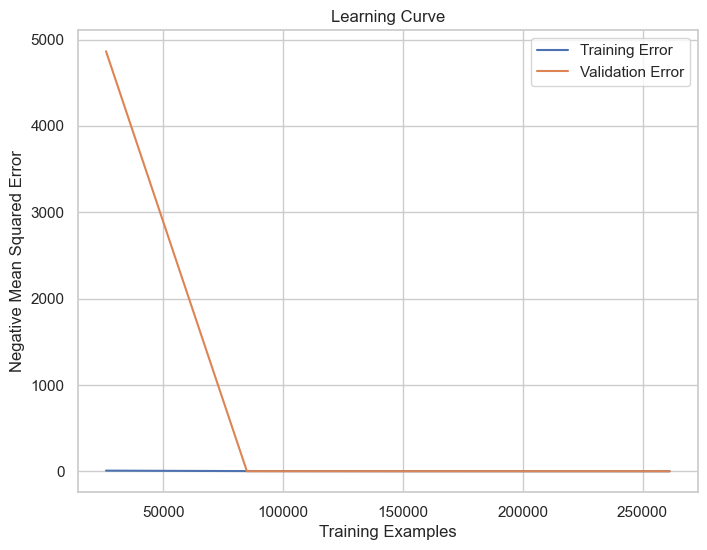

In [29]:
plot_learning_curve(LinearRegression(), X, y, cv=5)

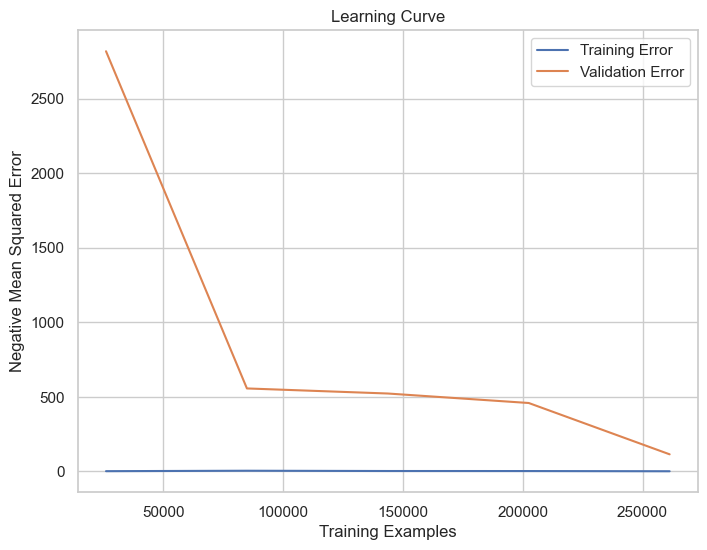

In [30]:
plot_learning_curve(RandomForestRegressor(), X, y, cv=5)

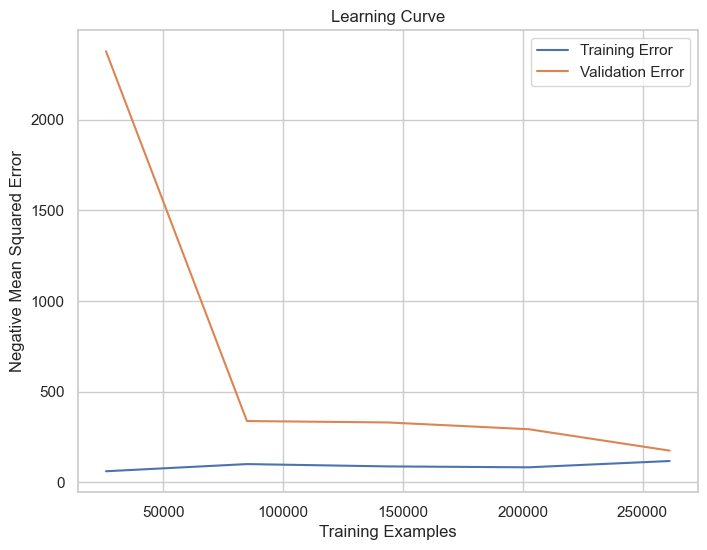

In [31]:
plot_learning_curve(GradientBoostingRegressor(), X, y, cv=5)

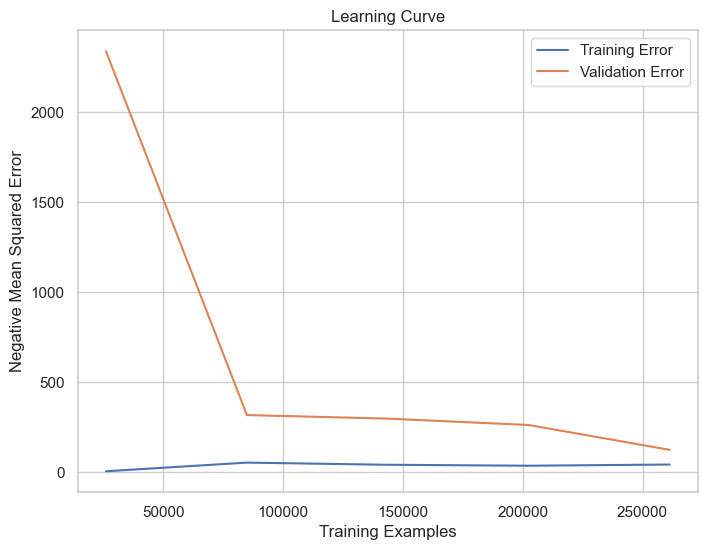

In [41]:
plot_learning_curve(XGBRegressor(), X, y, cv=5)

## The Learning Curves show that :

## 1) Linear Regression has no training error, and a decrease in validation proves that the Data Set is linear. Linear Regression Proves to be the Best model with high Prediction Score and the least Errors.

## 2)Random Forest Regressor gives a High Predictive Score But leads to erorrs More frequently than Linear regression model. 

## 3)Gradient Boost and XGBoost have Training error which lead to them being Unsatissfactory as Prediction Models.